In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
from fractions import Fraction
import matplotlib.pyplot as plt
import seaborn as sns



warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

## 1. Determine all the variable types and then find the fraction of the missing values for each variable.

In [4]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [5]:
def percentmissing (df):
    numer = df.isnull().sum() 
    denom = df.isnull().count()

    data= []
    #Below is code I used to check what the fractions were prior to trying to view with the dataframe version 
    #i = 0 
    #for x,y in zip(numer,denom):
    #    print (numer.index[i], ":", (Fraction(x,y)))
    #    i+=1

    #View results in dataframe
    i = 0
    for x,y in zip(numer,denom):
        data.append([numer.index[i],(Fraction(x,y)), x*100/y])
        i+=1
    
    df1 = pd.DataFrame(data,columns = ['Column_Name', 'Fraction of Missing Data','Percent'])
    return df1

percentmissing(education_df)

,Column_Name,Fraction of Missing Data,Percent
0,PRIMARY_KEY,0,0.000000
1,STATE,0,0.000000
2,YEAR,0,0.000000
3,ENROLL,263/1492,17.627346
4,TOTAL_REVENUE,53/373,14.209115
5,FEDERAL_REVENUE,53/373,14.209115
6,STATE_REVENUE,53/373,14.209115
7,LOCAL_REVENUE,53/373,14.209115
8,TOTAL_EXPENDITURE,53/373,14.209115
9,INSTRUCTION_EXPENDITURE,53/373,14.209115


## 2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

In [6]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [7]:
column_list = list(education_df.columns.values)
column_list.pop(2)
column_list.pop(1)
column_list.pop(0)
education_df2 = education_df.copy()
for col in column_list:
    # replace all NaN with the mean for the column. This prevents the mean of the column 
    # being changed but gives a value to each NaN
    education_df2.loc[:, col] = education_df2.loc[:, col].fillna(education_df2.loc[:, col].mean())

education_df2.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,915930.820993,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.661132
1,1992_ALASKA,ALASKA,1992,915930.820993,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,234.768293,278.414711,218.866154,258.859712
2,1992_ARIZONA,ARIZONA,1992,915930.820993,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,915930.820993,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,915930.820993,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.661132


In [8]:
percentmissing(education_df2)

,Column_Name,Fraction of Missing Data,Percent
0,PRIMARY_KEY,0,0.0
1,STATE,0,0.0
2,YEAR,0,0.0
3,ENROLL,0,0.0
4,TOTAL_REVENUE,0,0.0
5,FEDERAL_REVENUE,0,0.0
6,STATE_REVENUE,0,0.0
7,LOCAL_REVENUE,0,0.0
8,TOTAL_EXPENDITURE,0,0.0
9,INSTRUCTION_EXPENDITURE,0,0.0


## 3.Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [9]:
column_list = list(education_df.columns.values)
#remove the first three columns which are non-float columns
column_list.pop(2)
column_list.pop(1)
column_list.pop(0)

education_df3 = education_df.copy()

In [10]:
yearlist = list(education_df3.YEAR.unique())
yearlist

[1992,
 2001,
 1993,
 2016,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2017,
 2000,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [11]:
for year in yearlist:
    for col in column_list:
    # replace all NaN with the mean for the column. This prevents the mean of the column 
    # being changed but gives a value to each NaN
        education_df3.loc[education_df3['YEAR'] == year, col] = education_df3.loc[education_df3['YEAR'] == year, col].fillna(education_df3.loc[education_df3['YEAR'] == year, col].mean())

education_df3

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.307067
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,218.410116,266.360319,212.712256,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.307067
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


## 4. This time, fill in the missing values using interpolation (extrapolation).


In [12]:
education_df4 = education_df.copy()

for col in column_list:
    education_df4.loc[:, col] = education_df4.loc[:, col].interpolate(limit_direction='both')

education_df4

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,89711.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,258.859712
1,1992_ALASKA,ALASKA,1992,89711.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,211.790904,258.776900,207.088116,258.859712
2,1992_ARIZONA,ARIZONA,1992,89711.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,89711.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,89711.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,265.519676
5,1992_COLORADO,COLORADO,1992,89711.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,89711.0,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,89711.0,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,89711.0,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,89711.0,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


## 5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In [13]:
for col in column_list:
    print("Statistics for columns: {}".format(col))
    print(pd.concat([education_df[col], education_df2[col], education_df3[col], education_df4[col]], axis=1).describe())

Statistics for columns: ENROLL
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.492000e+03  1.385000e+03  1.492000e+03
mean   9.159308e+05  9.159308e+05  9.161654e+05  9.838759e+05
std    1.065280e+06  9.667725e+05  1.003532e+06  1.006773e+06
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  3.150940e+05  2.867590e+05  2.821195e+05
50%    6.483130e+05  8.204140e+05  7.374010e+05  7.373935e+05
75%    1.014528e+06  9.211780e+05  9.624880e+05  1.595024e+06
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Statistics for columns: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.441000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   9.084108e+06   1.111164e+07
std     1.174519e+07   1.087818e+07   1.110204e+07   1.200155e+07
min     4.656500e+05   4.656500e+05   4.656500e+05   4.656500e+05
25%     2.186305e+06   2.546261e+06   2.425

       GRADES_1_8_G  GRADES_1_8_G  GRADES_1_8_G  GRADES_1_8_G
count  1.361000e+03  1.492000e+03  1.390000e+03  1.492000e+03
mean   5.192140e+05  5.192140e+05  5.196200e+05  4.810102e+05
std    6.436384e+05  6.147133e+05  6.368932e+05  6.286622e+05
min    4.878000e+03  4.878000e+03  4.878000e+03  4.878000e+03
25%    1.106260e+05  1.211522e+05  1.129712e+05  8.127325e+04
50%    3.457750e+05  4.015865e+05  3.611705e+05  3.097340e+05
75%    6.119050e+05  5.749118e+05  6.052242e+05  5.783400e+05
max    3.929869e+06  3.929869e+06  3.929869e+06  3.929869e+06
Statistics for columns: GRADES_9_12_G
       GRADES_9_12_G  GRADES_9_12_G  GRADES_9_12_G  GRADES_9_12_G
count   1.361000e+03   1.492000e+03   1.390000e+03   1.492000e+03
mean    2.470714e+05   2.470714e+05   2.474932e+05   2.286678e+05
std     3.077056e+05   2.938773e+05   3.044943e+05   3.005815e+05
min     1.808000e+03   1.808000e+03   1.808000e+03   1.808000e+03
25%     5.147100e+04   5.919750e+04   5.270300e+04   3.950675e+04
50%     

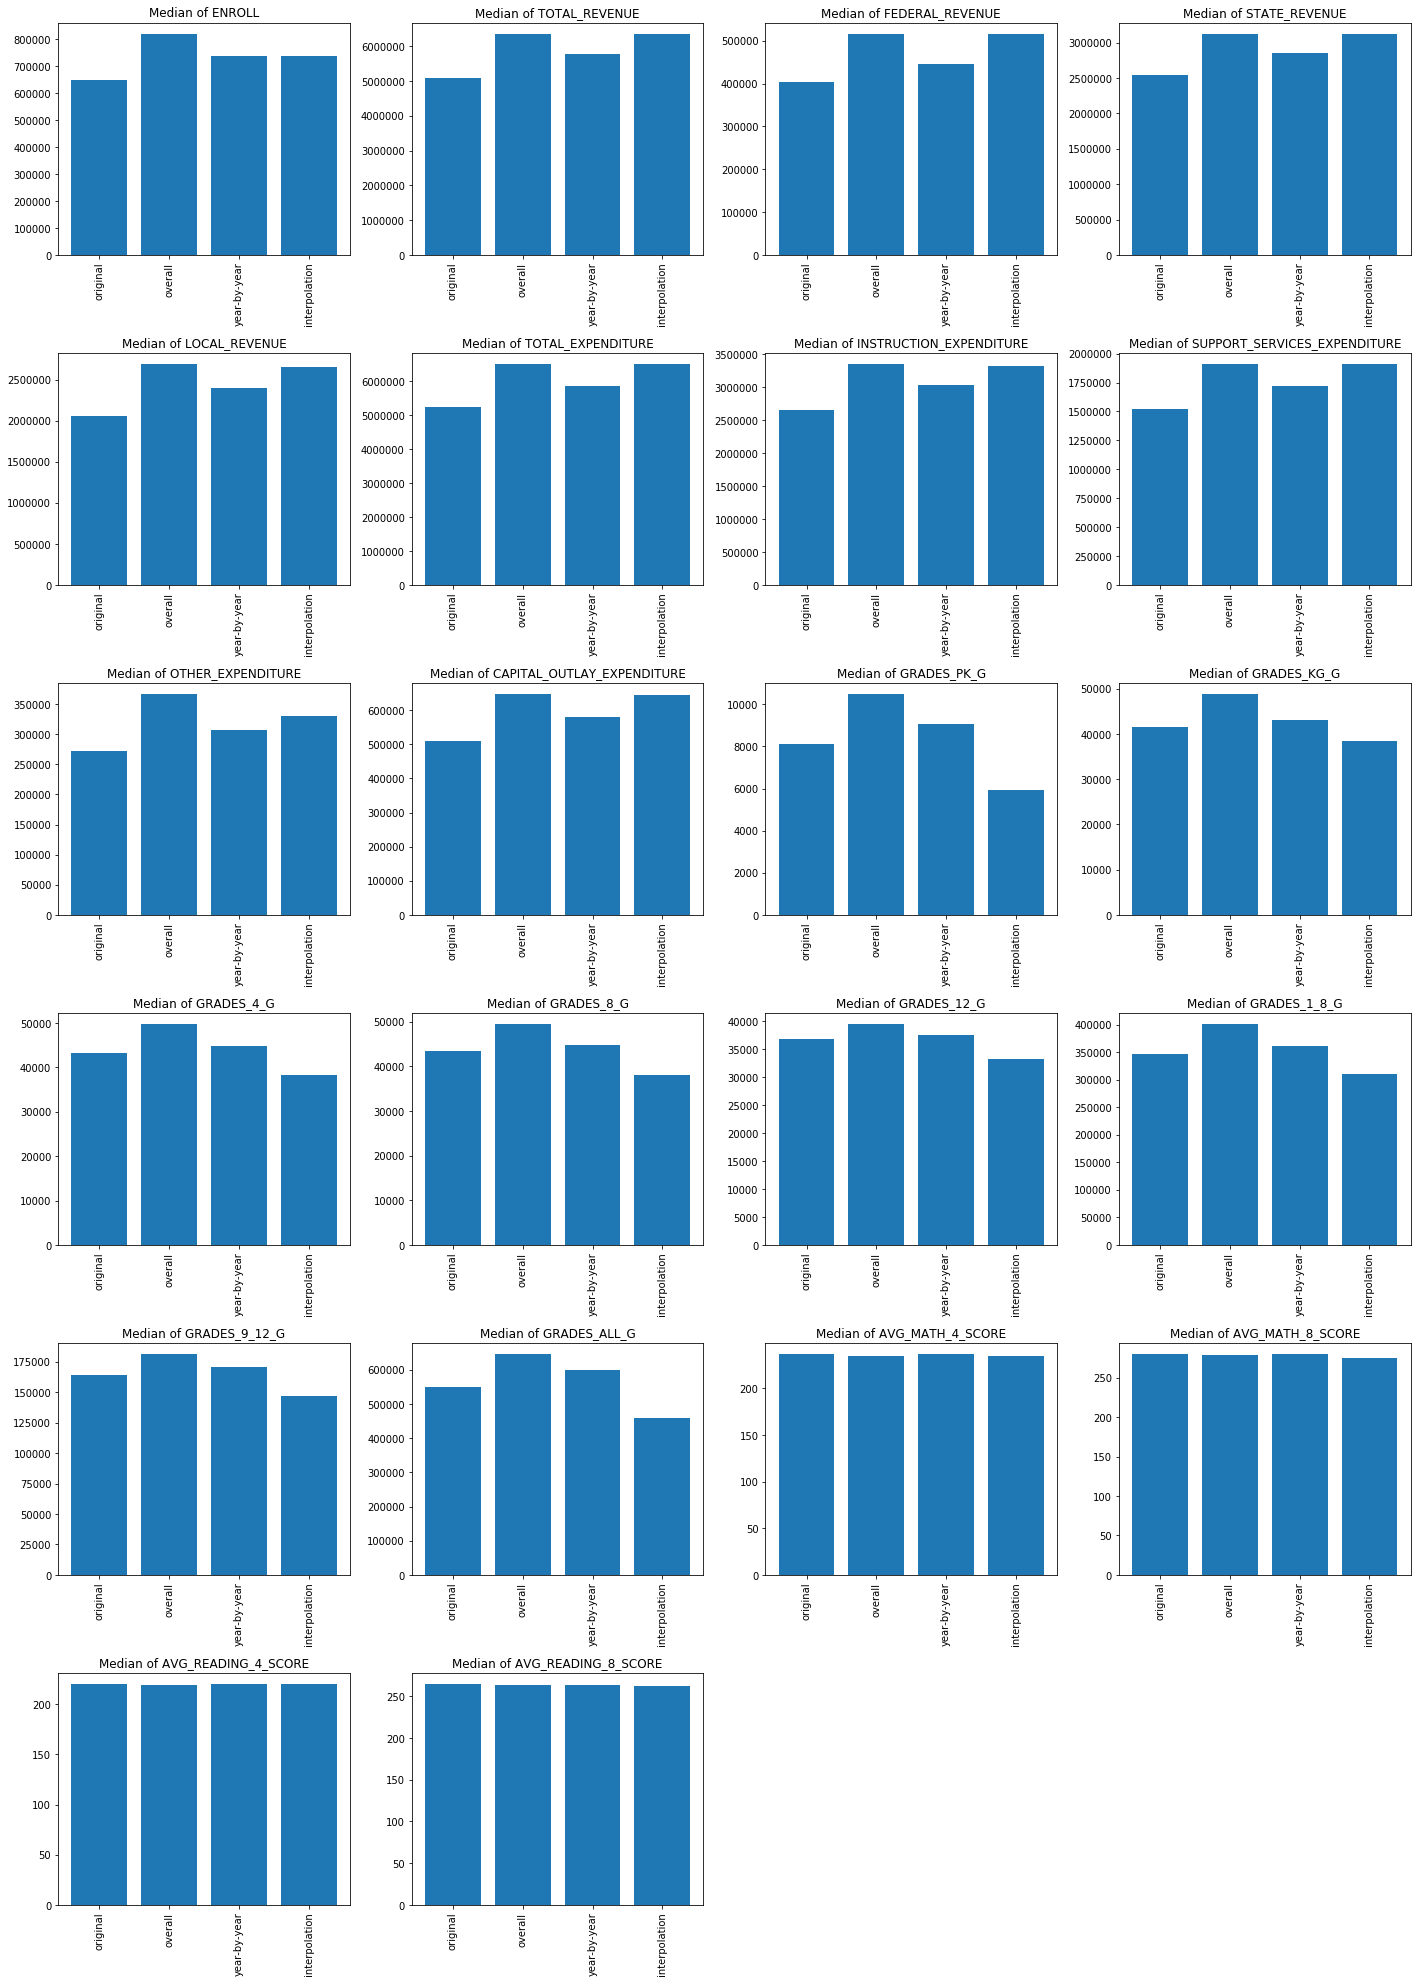

In [14]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(column_list):
    df = pd.concat([education_df[col], education_df2[col],
                     education_df3[col], education_df4[col]], axis=1)
    
    plt.subplot(len(column_list), 4, i+1)
    x = ["original", "overall", "year-by-year", "interpolation"]
    index = range(len(x))
    plt.xticks(index,x,rotation='vertical') 
    plt.bar(x, df.median())
    plt.title("Median of {}".format(col))
    
plt.tight_layout()
plt.show()

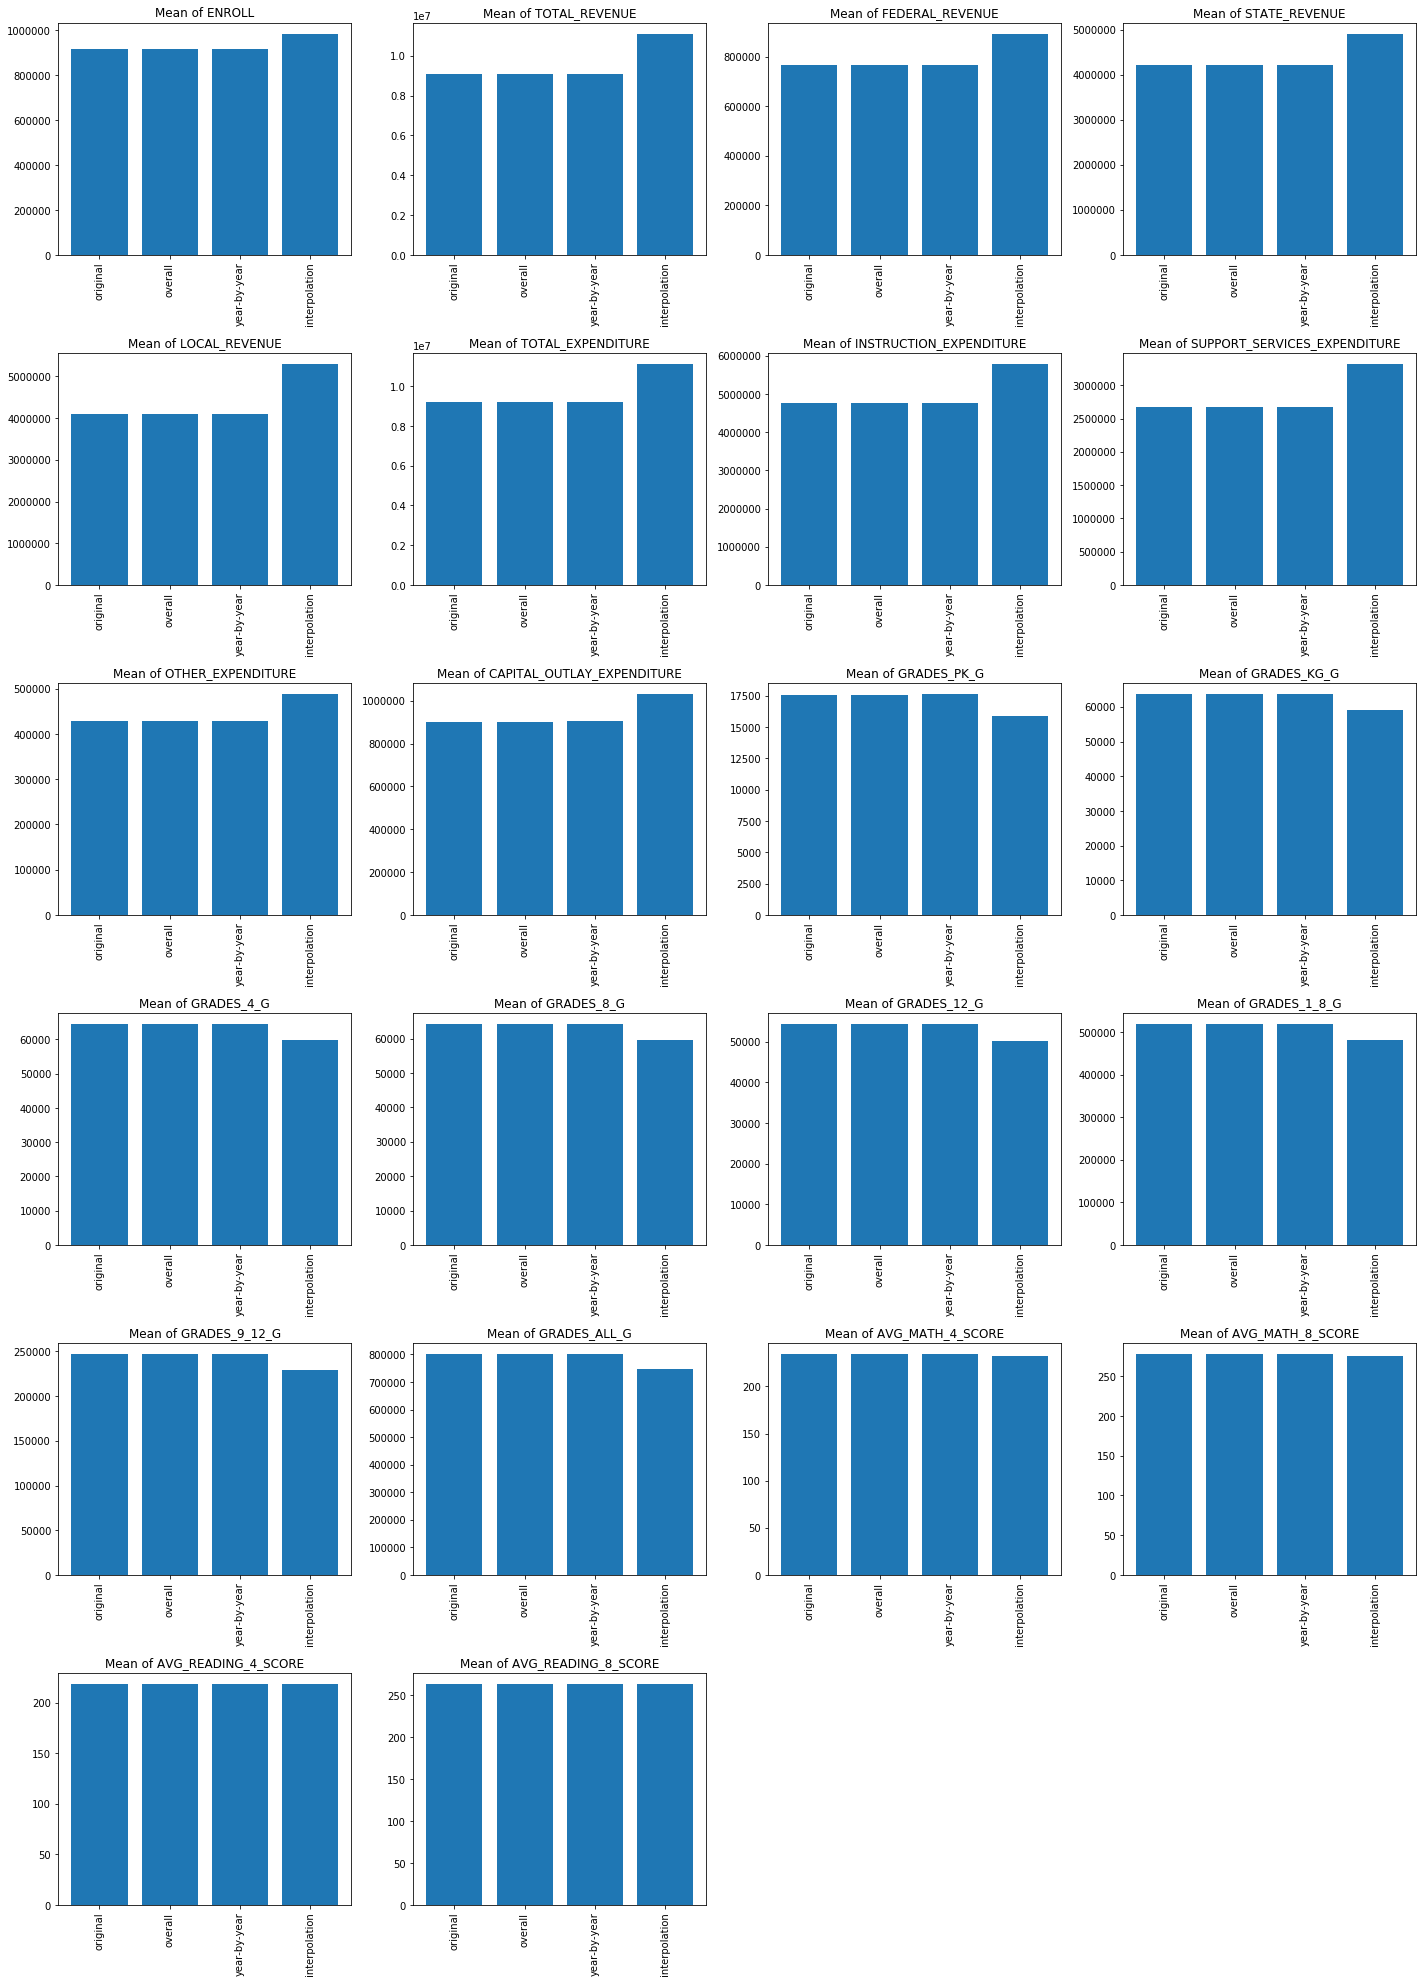

In [15]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(column_list):
    df = pd.concat([education_df[col], education_df2[col],
                     education_df3[col], education_df4[col]], axis=1)
    
    plt.subplot(len(column_list), 4, i+1)
    x = ["original", "overall", "year-by-year", "interpolation"]
    index = range(len(x))
    plt.xticks(index,x,rotation='vertical') 
    plt.bar(x, df.mean())
    plt.title("Mean of {}".format(col))
    
plt.tight_layout()
plt.show()

# If matplotlib under 2.2.0, bars will be automatically alphabetically arranged. Update to prevent issue with xlabels.

   ENROLL         ENROLL  ENROLL   ENROLL
0     NaN  915930.820993     NaN  89711.0
1     NaN  915930.820993     NaN  89711.0
2     NaN  915930.820993     NaN  89711.0
3     NaN  915930.820993     NaN  89711.0
4     NaN  915930.820993     NaN  89711.0
   TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
0      2678885.0      2678885.0      2678885.0      2678885.0
1      1049591.0      1049591.0      1049591.0      1049591.0
2      3258079.0      3258079.0      3258079.0      3258079.0
3      1711959.0      1711959.0      1711959.0      1711959.0
4     26260025.0     26260025.0     26260025.0     26260025.0
   FEDERAL_REVENUE  FEDERAL_REVENUE  FEDERAL_REVENUE  FEDERAL_REVENUE
0         304177.0         304177.0         304177.0         304177.0
1         106780.0         106780.0         106780.0         106780.0
2         297888.0         297888.0         297888.0         297888.0
3         178571.0         178571.0         178571.0         178571.0
4        2072470.0        

   AVG_READING_4_SCORE  AVG_READING_4_SCORE  AVG_READING_4_SCORE  \
0           207.963517           207.963517           207.963517   
1                  NaN           218.866154           212.712256   
2           206.212716           206.212716           206.212716   
3           208.634458           208.634458           208.634458   
4           196.764414           196.764414           196.764414   

   AVG_READING_4_SCORE  
0           207.963517  
1           207.088116  
2           206.212716  
3           208.634458  
4           196.764414  
   AVG_READING_8_SCORE  AVG_READING_8_SCORE  AVG_READING_8_SCORE  \
0                  NaN           263.661132           263.307067   
1           258.859712           258.859712           258.859712   
2           262.169895           262.169895           262.169895   
3           264.619665           264.619665           264.619665   
4                  NaN           263.661132           263.307067   

   AVG_READING_8_SCORE  
0      

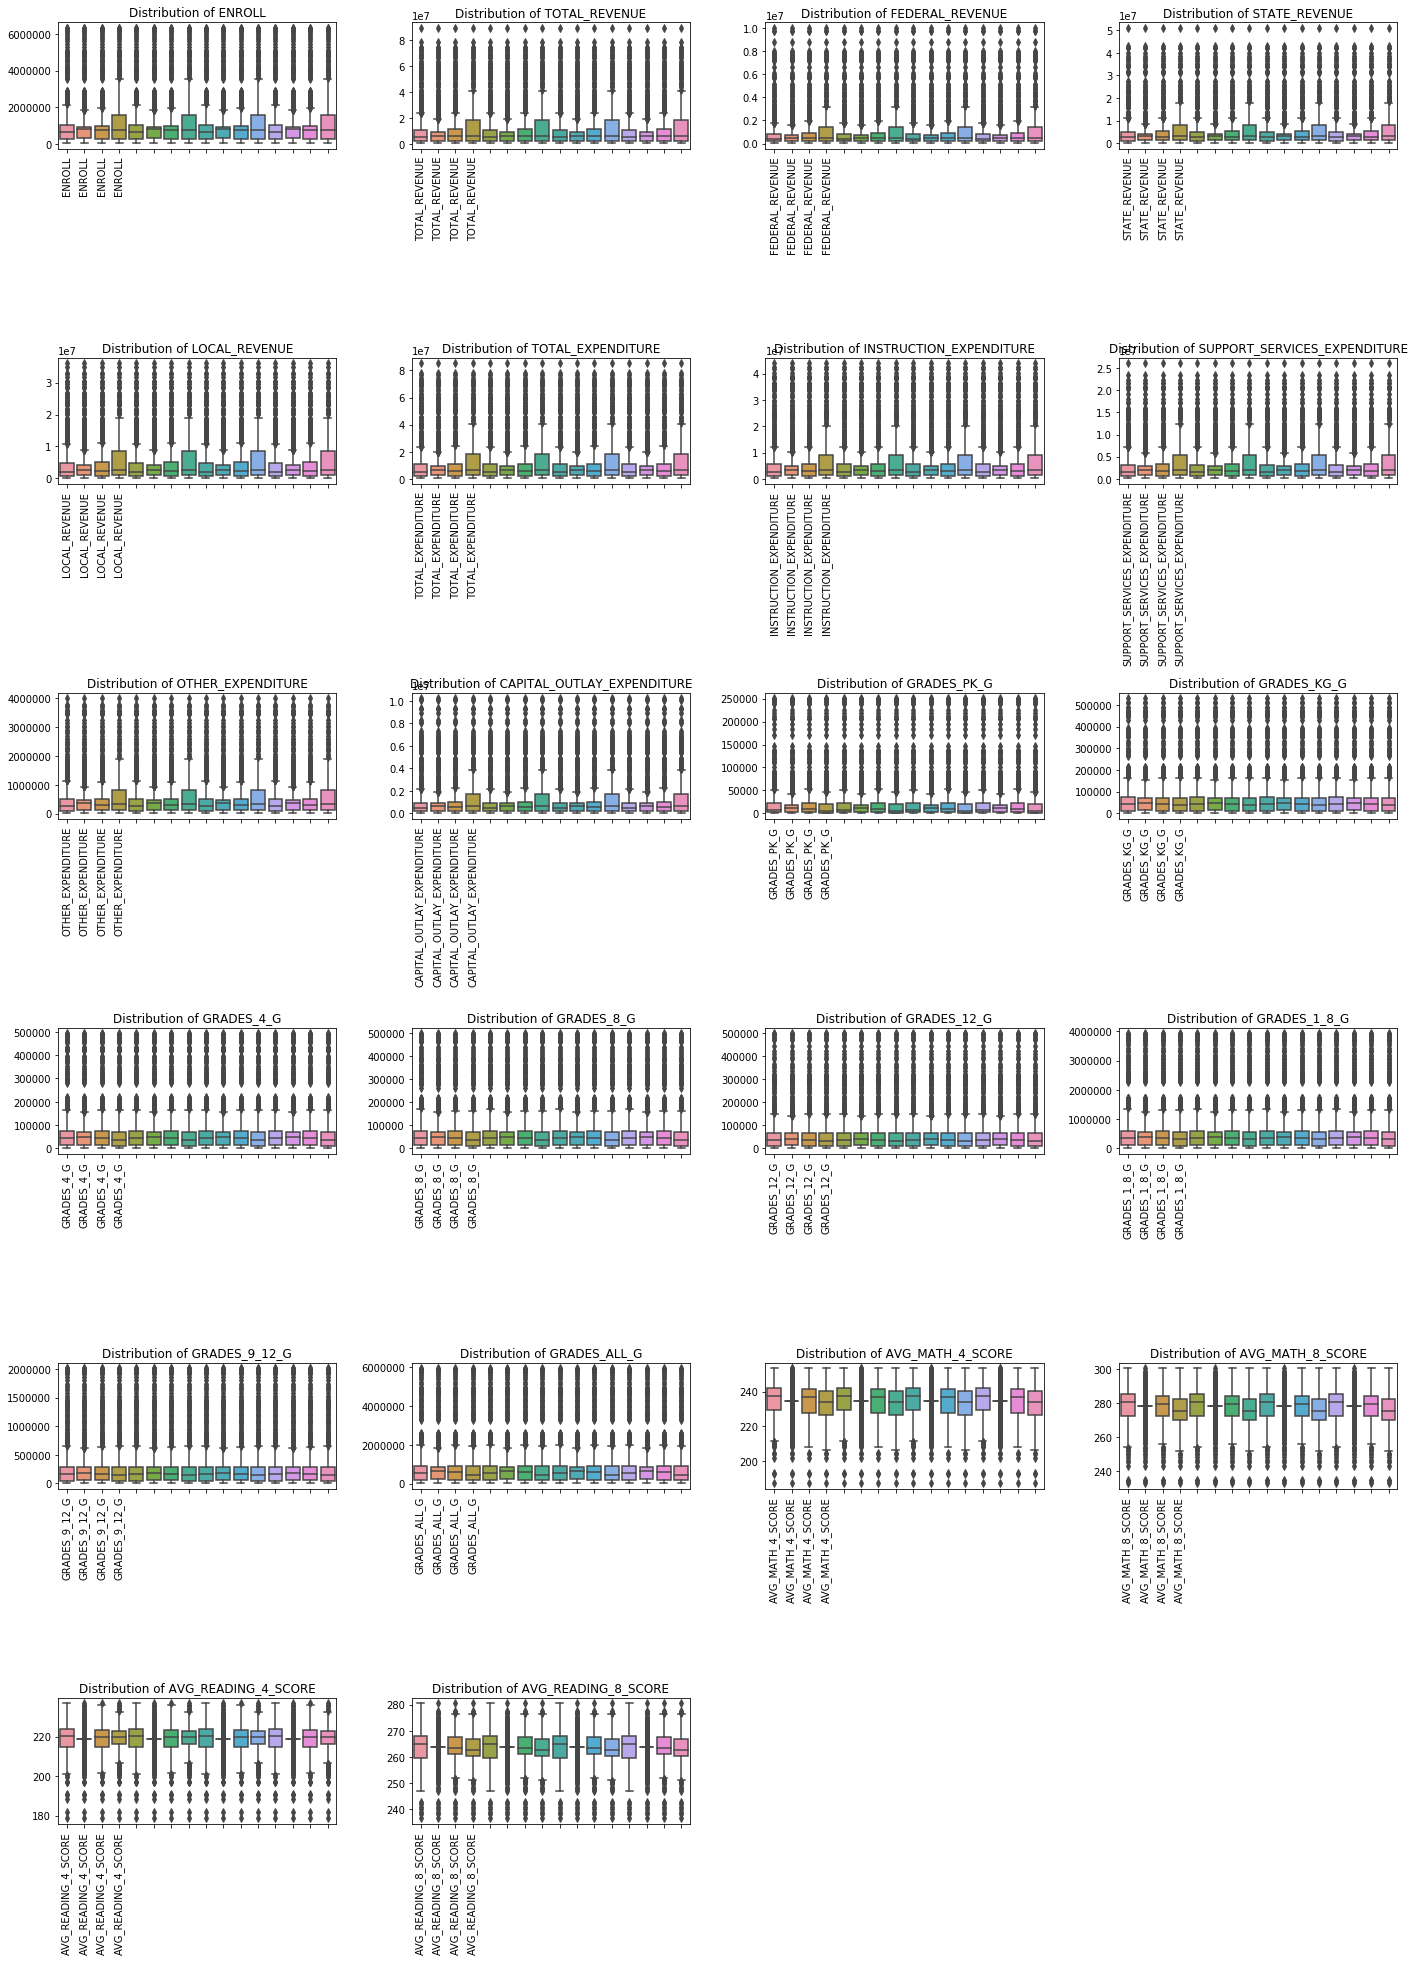

In [16]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(column_list):
    df = pd.concat([education_df[col], education_df2[col],
                     education_df3[col], education_df4[col]], axis=1)
    print(df.head())
    plt.subplot(len(column_list), 4, i+1)
    sns.boxplot(data=df[col])
    plt.xticks(rotation='vertical')
    plt.title("Distribution of {}".format(col))
    
plt.tight_layout()
plt.show()
## Not sure why all the graphs have 16 columns instead or 4

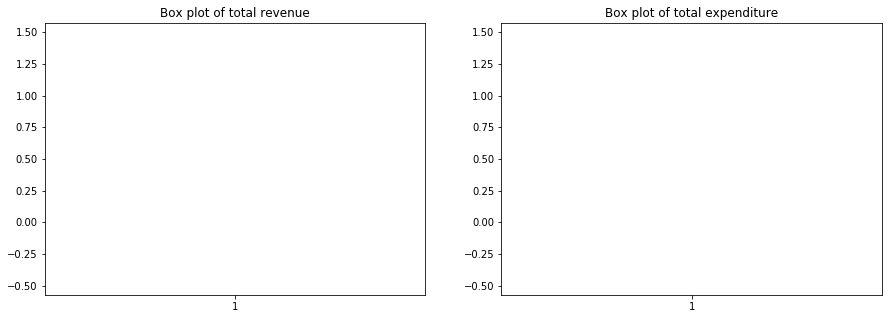

In [17]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(education_df["TOTAL_REVENUE"], whis = 5)
plt.title("Box plot of total revenue")

plt.subplot(1,2,2)
plt.boxplot(education_df["TOTAL_EXPENDITURE"], whis = 5)
plt.title("Box plot of total expenditure")
plt.show()